# DeepWalk实战-维基百科词条图嵌入可视化

## 安装工具包

In [1]:
# !pip install networkx gensim pandas numpy tqdm scikit-learn matplotlib

## 导入工具包

In [2]:
import networkx as nx # 图数据挖掘

# 数据分析
import pandas as pd
import numpy as np

import random # 随机数
from tqdm import tqdm # 进度条

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
df = pd.read_csv("./data/bilibili_tag2.csv", sep = "\t")

In [4]:
df.head()

,A,B
0,科技,万物研究所
1,科技,知识
2,科技,科学科普
3,科技,人类史
4,科技,科学史


In [5]:
df.shape

(6690, 2)

## 构建无向图

In [6]:
G = nx.from_pandas_edgelist(df, df.columns[0], df.columns[1], create_using=nx.Graph())

In [7]:
# 节点个数
len(G)

1234

## 可视化

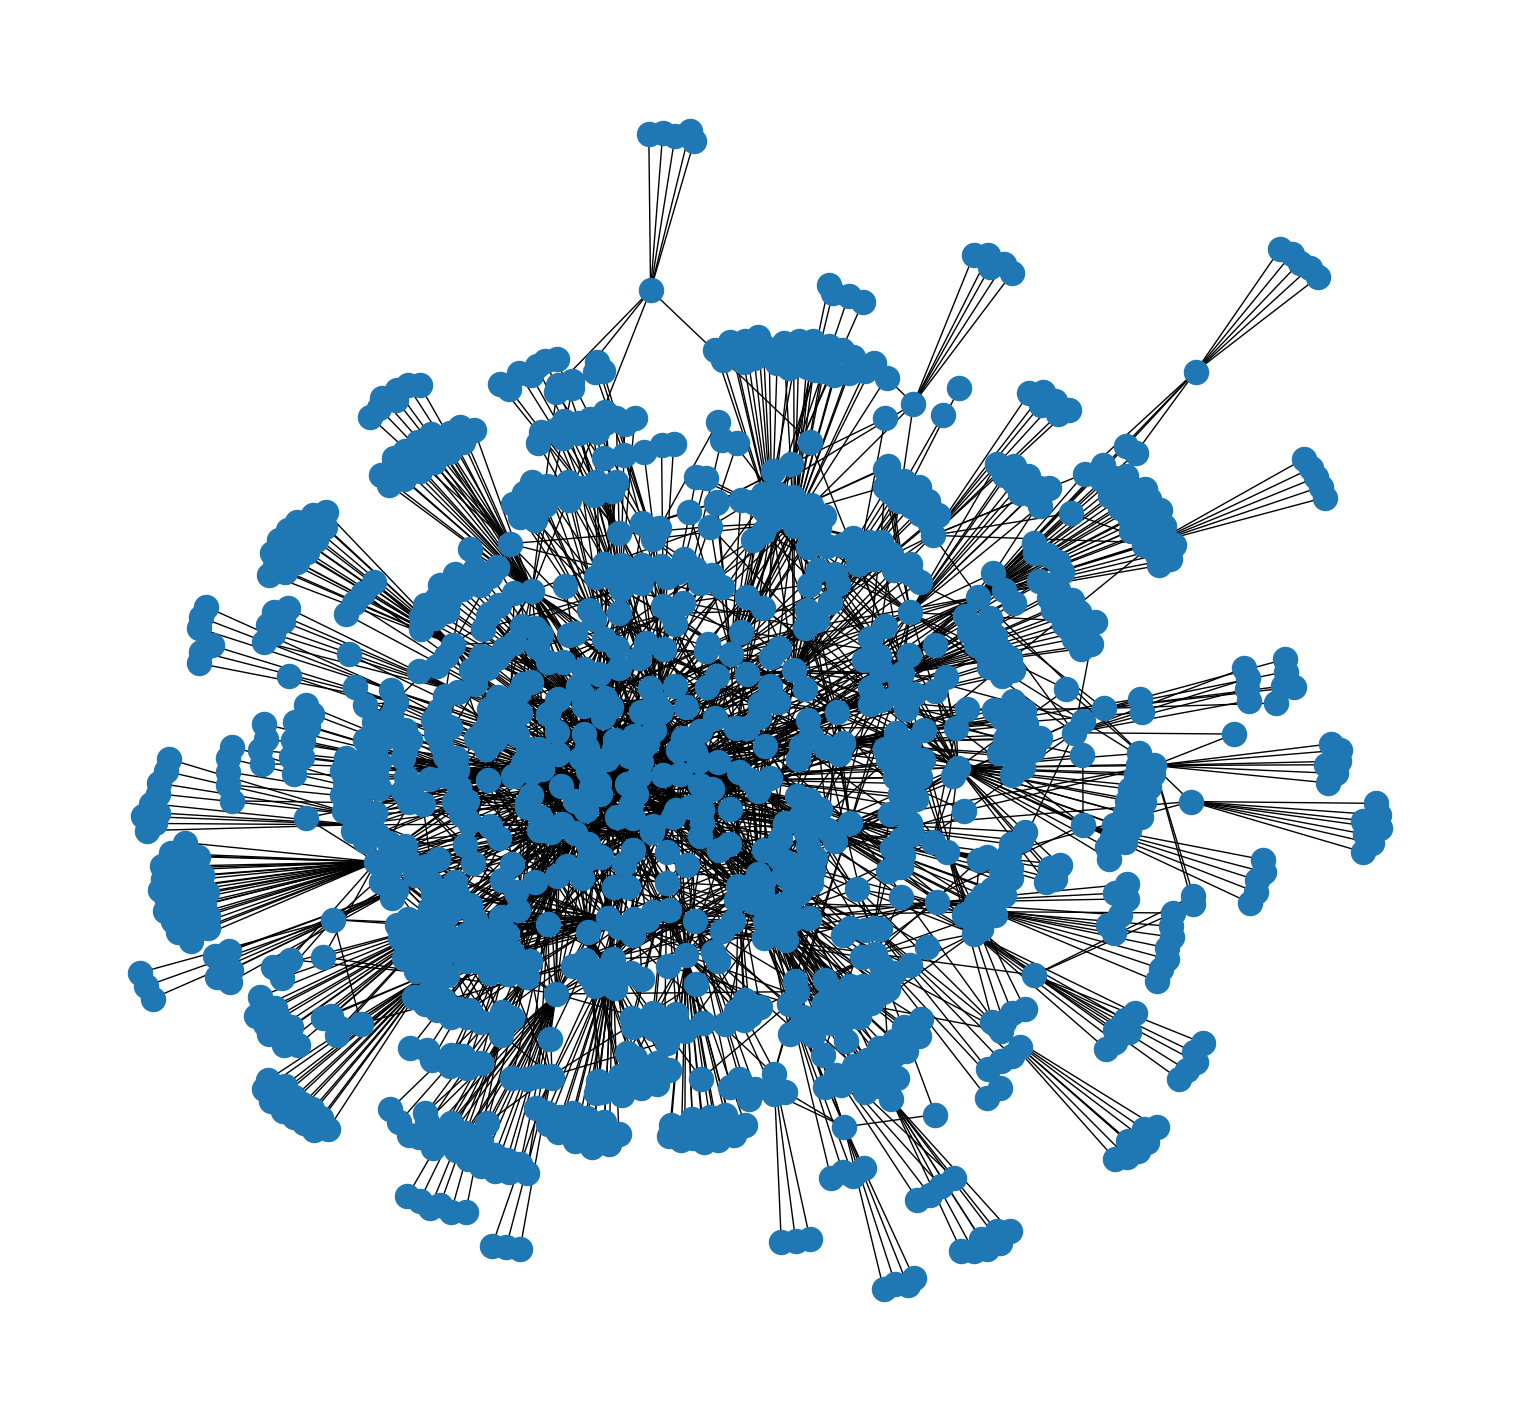

In [8]:
# 可视化
plt.figure(figsize=(15,14))
nx.draw(G)
plt.show()

## 生成随机游走节点序列的函数

In [9]:
def get_randomwalk(node, path_length):
    '''
    输入起始节点和路径长度，生成随机游走节点序列
    '''
    
    random_walk = [node]
    
    for i in range(path_length-1):
        # 汇总邻接节点
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break
        # 从邻接节点中随机选择下一个节点
        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [10]:
all_nodes = list(G.nodes())

In [11]:
all_nodes

['科技',
 '万物研究所',
 '知识',
 '科学科普',
 '人类史',
 '科学史',
 'FOXP2',
 '智人',
 '科技史',
 '工具',
 '原始人',
 '走出非洲',
 '尼安德特人',
 '万物研究所·第九期',
 '生物',
 '科学',
 '科普',
 '自然',
 '万物研究所·第十期',
 '鉴定',
 '人工智能',
 '互联网',
 '学习',
 '流行音乐',
 '华语音乐',
 '研究',
 '数据',
 '傅里叶变换',
 '万物研究所·第七期',
 '深度学习',
 '眼镜',
 '医学',
 '健康',
 '搞笑',
 '医案寻踪',
 '骗局',
 '沙雕',
 '近视',
 '万物研究所·2022第五期',
 '灾难',
 '非洲',
 '疾病',
 '埃博拉病毒',
 '瘟疫',
 '病毒',
 '化学',
 '实验',
 '鸡',
 '坤坤',
 'ikun',
 '鸡你太美',
 '我们都爱搞学习',
 '高考',
 '校园学习',
 '复习',
 '高中',
 '高中生物',
 '经验分享',
 '学习心得',
 '我们都爱搞学习·第二期',
 '考试',
 '大学',
 '校园',
 '学生党',
 '摆烂',
 '必剪创作',
 '基础知识',
 '易错点',
 '知识点',
 '恐龙',
 '剪辑',
 '生命',
 '古生物',
 '史前星球',
 '年表',
 '打卡挑战',
 '复习提纲朗读',
 '知识点梳理朗读',
 '初中生物',
 '中考生物',
 '生物知识点',
 '社会洞察计划',
 '冷知识',
 '人文',
 '社科·法律·心理',
 '趣闻',
 '星海计划',
 '干货',
 '大力王',
 '心理学知识',
 '高三',
 '课程',
 '逆袭',
 '遗传',
 '天文',
 '地理',
 '量子',
 '祖师爷',
 '全能打卡挑战',
 '天文学',
 '科学很可爱',
 '科学中穿梭',
 '历史的遗憾',
 '遗憾',
 '科学家',
 '涨知识',
 '2023科学很可爱',
 '正经的知识又增加了',
 '视频教程',
 '儿童',
 '少儿',
 '儿童教育',
 '宇宙',
 '休谟问题',
 '贝叶斯主义',
 '奥卡姆剃刀',
 '进化论',
 

In [12]:
get_randomwalk('手机', 5)

['手机', '黑科技', '动漫', '沙雕', '论BGM的重要性']

## 生成随机游走序列

In [13]:
gamma = 10 # 每个节点作为起始点生成随机游走序列个数
walk_length = 5 # 随机游走序列最大长度

In [14]:
random_walks = []

for n in tqdm(all_nodes): # 遍历每个节点
    for i in range(gamma): # 每个节点作为起始点生成gamma个随机游走序列
        random_walks.append(get_randomwalk(n, walk_length))

100%|████████████████████████████████████████████████████████████████████████████| 1234/1234 [00:00<00:00, 8060.25it/s]


In [15]:
# 生成随机游走序列个数
len(random_walks)

12340

In [16]:
random_walks[1]

['科技', '科技猎手2023', '搞笑', '万恶之源', '真香']

## 训练Word2Vec模型

In [17]:
from gensim.models import Word2Vec # 自然语言处理

In [18]:
model = Word2Vec(vector_size=32, # Embedding维数
                 window=1, # 窗口宽度
                 sg=1, # Skip-Gram
                 hs=0, # 不加分层softmax
                 negative=10, # 负采样
                 alpha=0.03,  # 初始学习率
                 min_alpha=0.0007, # 最小学习率
                 seed=14 # 随机数种子
                )

In [19]:
# 用随机游走序列构建词汇表
model.build_vocab(random_walks, progress_per=2)

In [20]:
# 训练（耗时1分钟左右）
model.train(random_walks, total_examples=model.corpus_count, epochs=50, report_delay=1)

(2127029, 2590500)

## 分析Word2Vec结果

In [21]:
# 查看某个节点的Embedding
model.wv.get_vector('手机').shape

(32,)

In [22]:
model.wv.get_vector('手机')

array([ 0.1347004 , -0.40834787, -1.7492028 ,  1.7378973 , -0.36709613,
       -1.0020734 ,  0.5376936 , -0.91757816, -0.02358342,  0.27040437,
        0.10609683, -1.0899227 ,  0.34969524,  0.13432826, -1.0356917 ,
        0.94791055, -0.50381845, -0.3493505 ,  1.3405663 , -0.24162997,
       -1.0853244 ,  0.9281219 ,  0.6864775 , -0.2375613 , -0.31435603,
       -0.2749227 ,  0.6482425 , -0.15681635, -0.28595042, -0.01204351,
       -1.0768628 , -0.41071817], dtype=float32)

In [23]:
# 找相似词语
model.wv.similar_by_word('手机')

[('漫画', 0.9305698275566101),
 ('APP推荐', 0.924244225025177),
 ('加速器', 0.9241719841957092),
 ('插画', 0.9104030132293701),
 ('免费加速器', 0.901024580001831),
 ('科技猎手计划2022第二季', 0.8729802370071411),
 ('vivo', 0.8687996864318848),
 ('第一', 0.8662387132644653),
 ('行业', 0.8648654818534851),
 ('绘画', 0.834891140460968)]

## PCA降维可视化

### 可视化全部词条的二维Embedding

In [24]:
X = model.wv.vectors

In [25]:
# 将Embedding用PCA降维到2维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embed_2d = pca.fit_transform(X)

In [26]:
embed_2d.shape

(1234, 2)

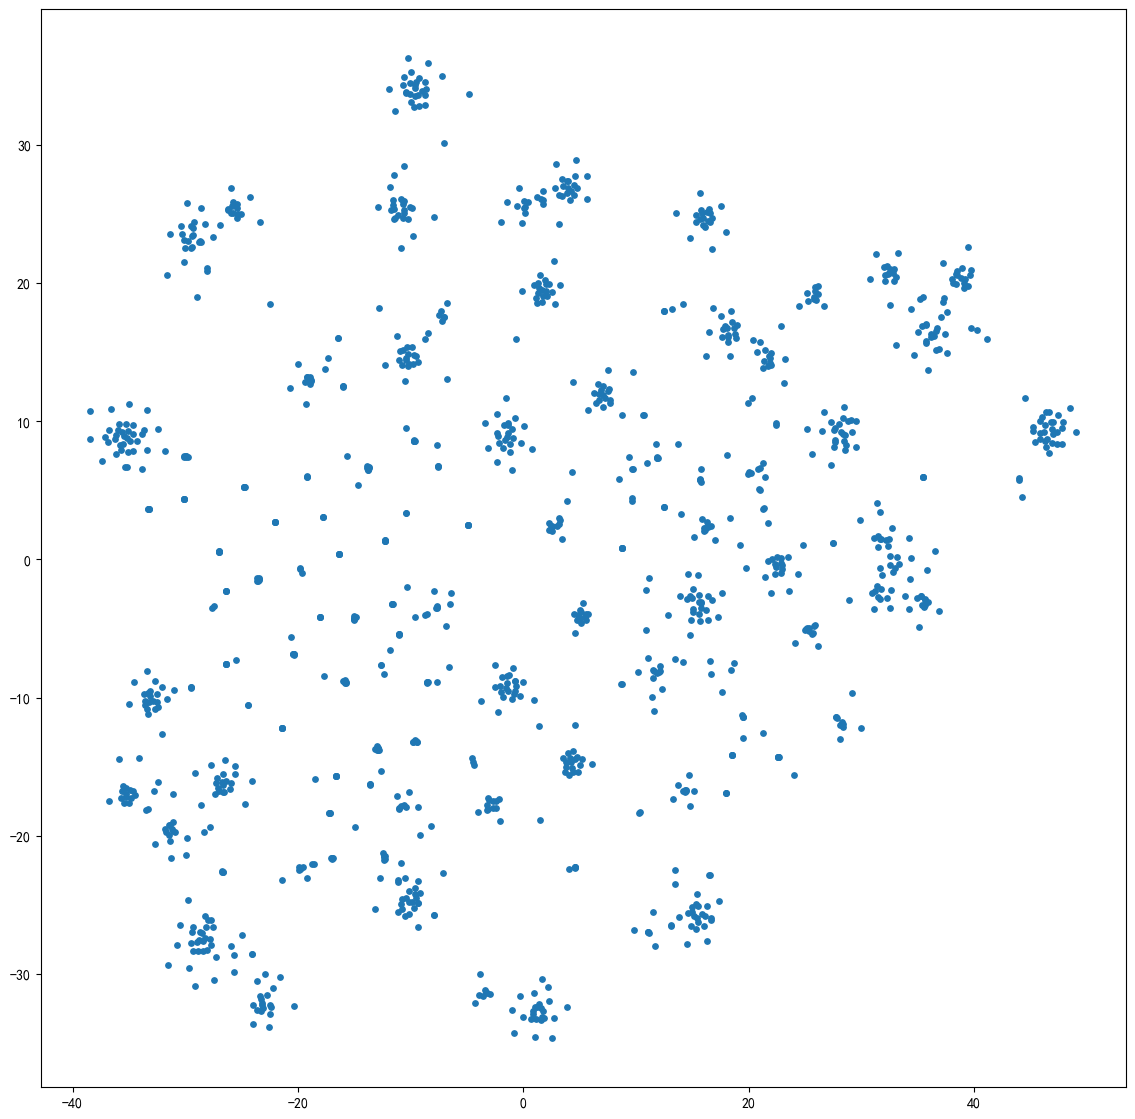

In [57]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1],s=15)
plt.show()

### 可视化某个词条的二维Embedding

In [28]:
term = '手机'

In [29]:
term_256d = model.wv[term].reshape(1,-1)

In [30]:
term_256d.shape

(1, 32)

In [31]:
term_2d = pca.transform(term_256d)

In [32]:
term_2d

array([[0.5395716 , 0.69688356]], dtype=float32)

In [33]:
# 查找 嘻哈 节点的相似节点
model.wv.most_similar('数码')

[('手机', 0.8129730820655823),
 ('野生技术协会', 0.7800456881523132),
 ('科技猎手计划2022第二季', 0.7748316526412964),
 ('APP推荐', 0.7382550239562988),
 ('技术宅', 0.7364977598190308),
 ('加速器', 0.7344469428062439),
 ('数据清理', 0.7269530892372131),
 ('漫画', 0.7253586053848267),
 ('第一', 0.71800297498703),
 ('vivo', 0.7173725962638855)]

In [34]:
# 查看任意两个节点的相似度
model.wv.similarity('数码', '手机')

0.8129729

In [35]:
# 查看任意两个节点的相似度
model.wv.similarity('数码', '电影')

0.32855916

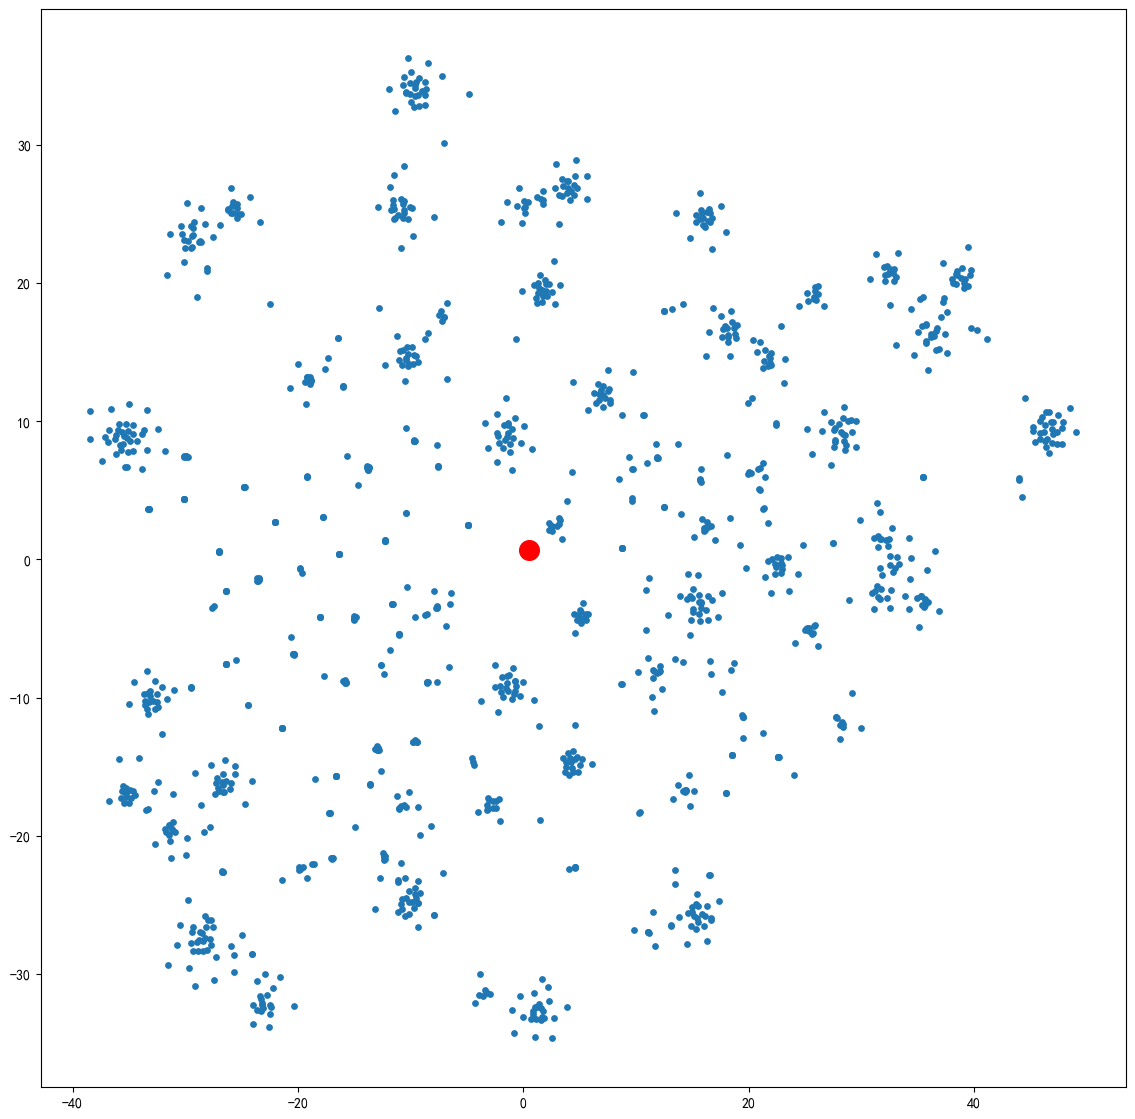

In [56]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1],s=15)
plt.scatter(term_2d[:,0],term_2d[:,1],c='r',s=200)
plt.show()

### 可视化某些词条的二维Embedding

In [37]:
# 计算PageRank重要度
pagerank = nx.pagerank(G)
# 从高到低排序
node_importance = sorted(pagerank.items(), key=lambda x:x[1], reverse=True)

In [38]:
# 取最高的前n个节点
n = 50
terms_chosen = []
for each in node_importance[:n]:
    terms_chosen.append(each[0])

In [39]:
# 手动补充新节点
# terms_chosen.extend(['computer vision','deep learning','convolutional neural network','convolution','natural-language processing','attention (machine learning)','support-vector machine','decision tree','random forest','computational imaging','machine vision','cognitive science','neuroscience','psychophysics','brain','visual cortex','visual neuroscience','cognitive model','finite difference','finite difference time domain','finite difference coefficients','finite difference methods for option pricing','iso 128','iso 10303'])


In [40]:
terms_chosen

['知识',
 '科普',
 '学习',
 '数据',
 '科学科普',
 '科学',
 '眼镜',
 '人文',
 '自然',
 '健康',
 '沙雕',
 '华语音乐',
 '研究',
 '冷知识',
 '搞笑',
 '流行音乐',
 '人工智能',
 '瘟疫',
 '非洲',
 '万物研究所·第十期',
 'ikun',
 '生物',
 '深度学习',
 '鸡你太美',
 '社会洞察计划',
 '社科·法律·心理',
 '灾难',
 '鉴定',
 '万物研究所·第七期',
 '生活',
 '万物研究所',
 '高考',
 '互联网',
 '骗局',
 '病毒',
 '鸡',
 '近视',
 '傅里叶变换',
 '医案寻踪',
 '坤坤',
 '医学',
 '埃博拉病毒',
 '音乐',
 '科技',
 '疾病',
 '万物研究所·2022第五期',
 '实验',
 '化学',
 '知识分享官',
 '校园学习']

In [41]:
# 输入词条，输出词典中的索引号
term2index = model.wv.key_to_index

In [42]:
# index2term = model.wv.index_to_key
# term_index = np.array(term2index.values())

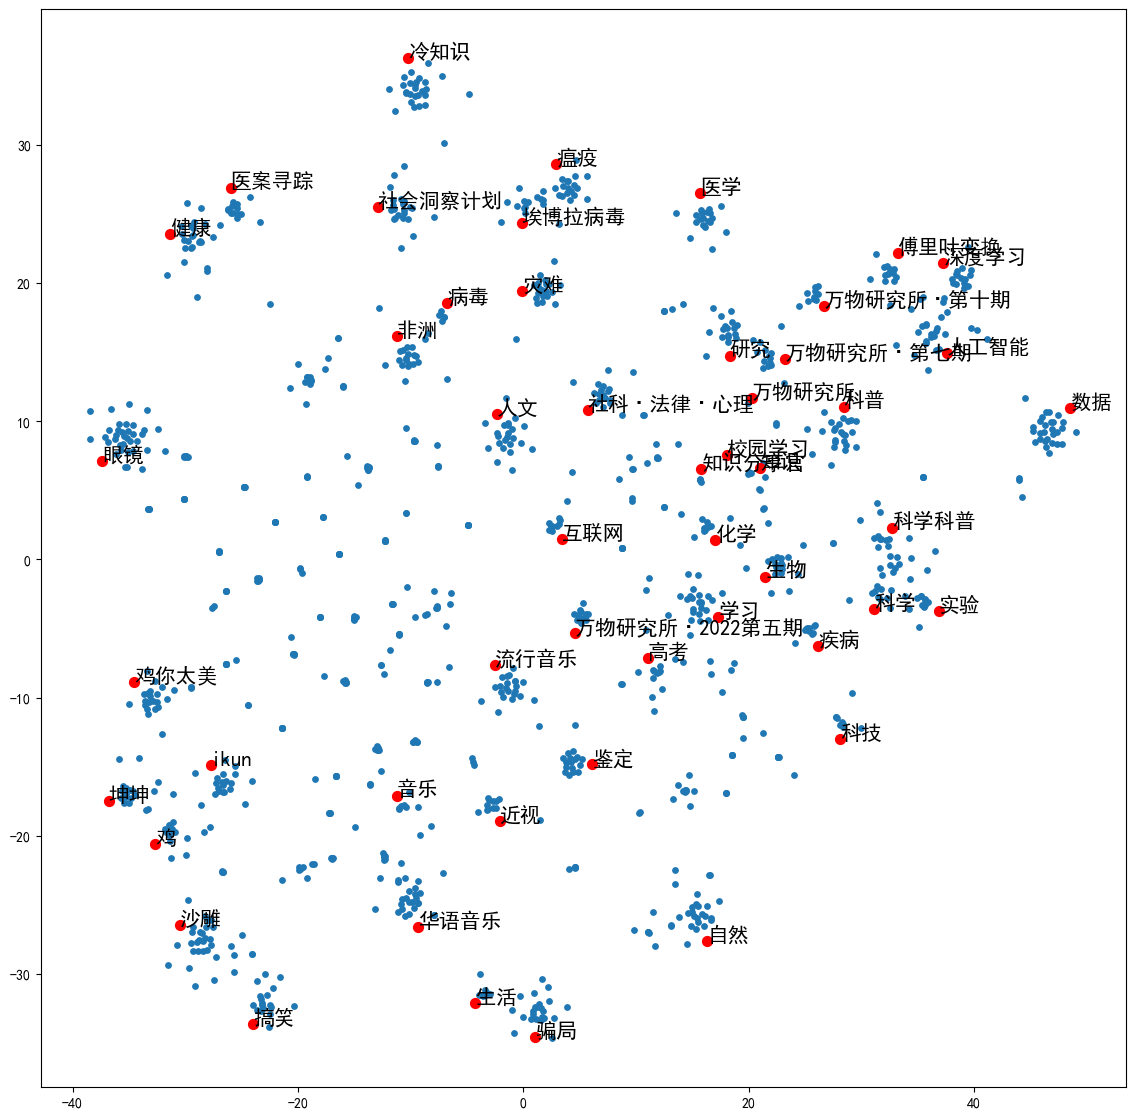

In [55]:
# 可视化全部词条和关键词条的二维Embedding
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1],s=15)

for item in terms_chosen:
    idx = term2index[item]
    plt.scatter(embed_2d[idx,0], embed_2d[idx,1],c='r',s=50)
    plt.annotate(item, xy=(embed_2d[idx,0], embed_2d[idx,1]),c='k',fontsize=15)
plt.show()

## TSNE降维可视化

### 可视化全部词条的二维Embedding¶

In [44]:
# 将Embedding用TSNE降维到2维
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=1000)
embed_2d = tsne.fit_transform(X)

D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


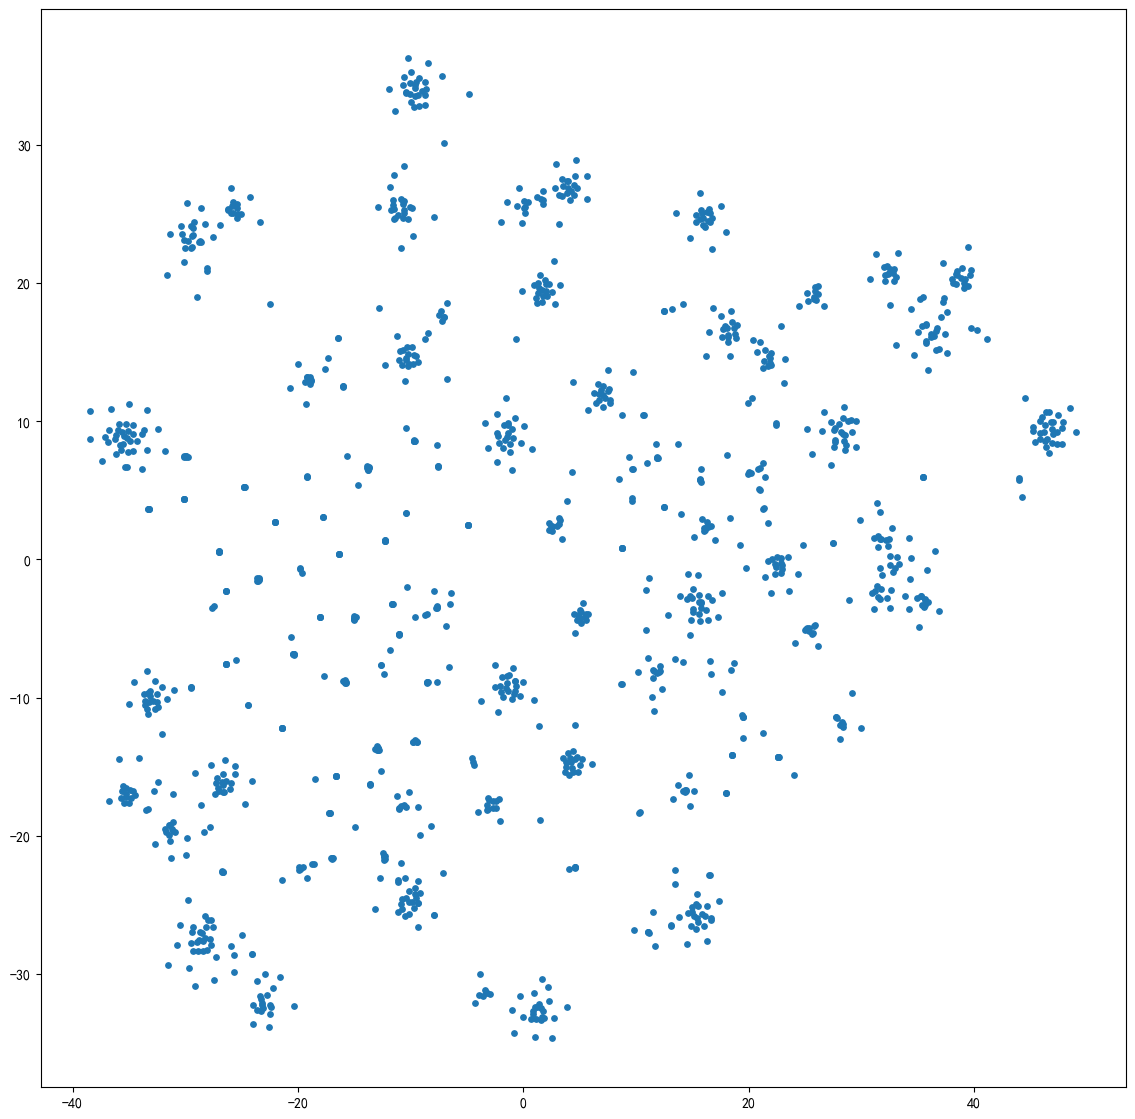

In [53]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1],s=15)
plt.show()

### 可视化全部词条和关键词条的二维Embedding

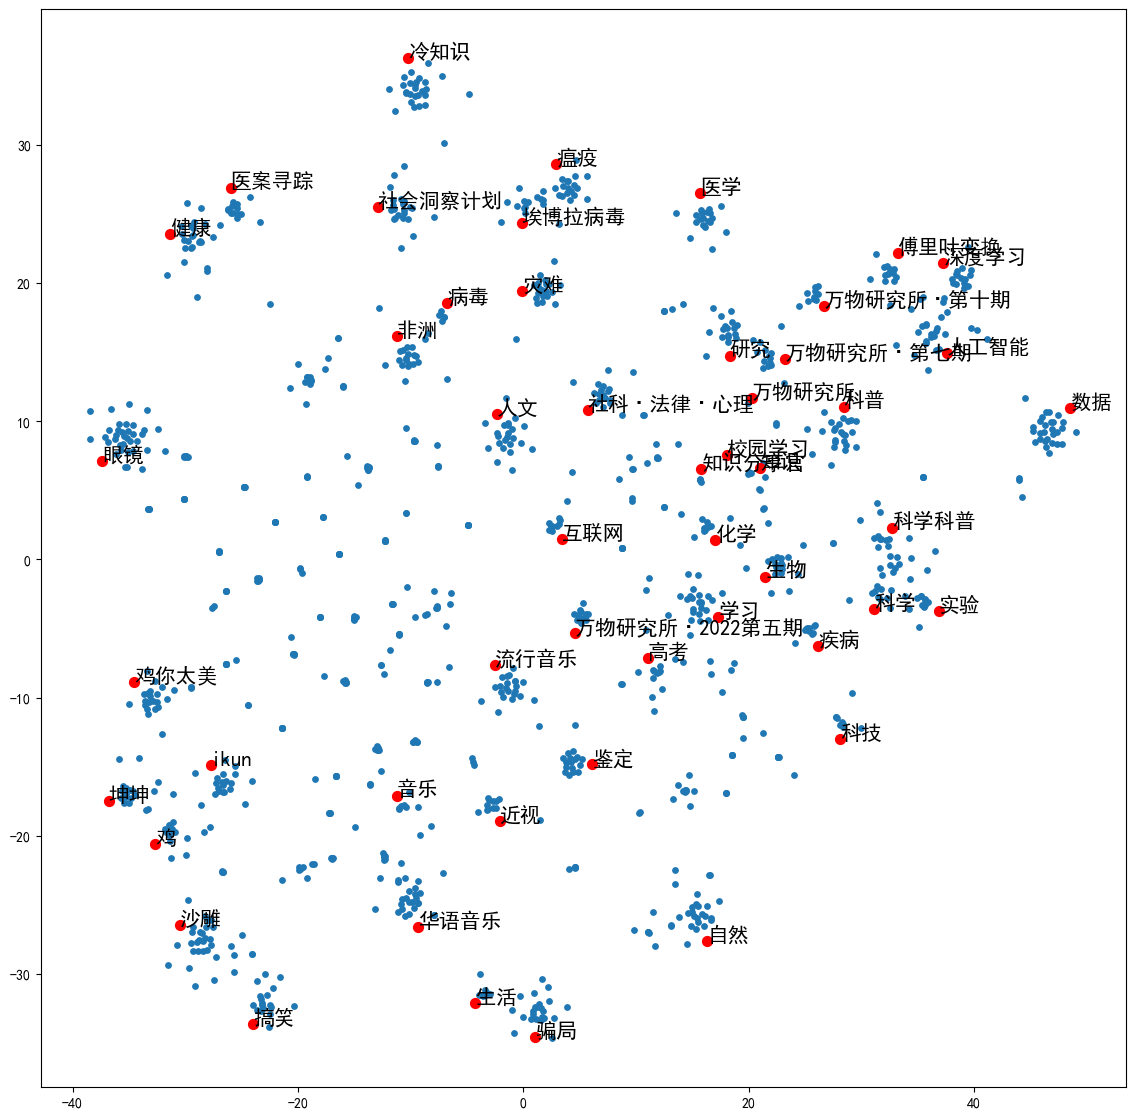

In [54]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1],s=15)

for item in terms_chosen:
    idx = term2index[item]
    plt.scatter(embed_2d[idx,0], embed_2d[idx,1],c='r',s=50)
    plt.annotate(item, xy=(embed_2d[idx,0], embed_2d[idx,1]),c='k',fontsize=15)
plt.show()

In [47]:
embed_2d.shape

(1234, 2)

### 导出TSNE降维到二维之后的Embedding

In [48]:
terms_chosen_mask = np.zeros(X.shape[0])
for item in terms_chosen:
    idx = term2index[item]
    terms_chosen_mask[idx] = 1

In [49]:
df = pd.DataFrame()
df['X'] = embed_2d[:,0]
df['Y'] = embed_2d[:,1]
df['item'] = model.wv.index_to_key
df['pagerank'] = pagerank.values()
df['chosen'] = terms_chosen_mask

In [50]:
df

,X,Y,item,pagerank,chosen
0,20.962633,6.617174,知识,0.005514,1.0
1,28.414270,11.045597,科普,0.007057,1.0
2,17.294786,-4.160235,学习,0.015731,1.0
3,32.693096,2.297167,科学科普,0.010548,1.0
4,48.512146,10.931327,数据,0.000278,1.0
...,...,...,...,...,...
1229,12.167103,-8.099051,燃,0.000282,0.0
1230,-9.775669,-13.245219,ACG音乐,0.000282,0.0
1231,27.786690,-11.426850,科技史,0.000282,0.0
1232,-24.006836,-32.262497,娱乐杂谈,0.000271,0.0


In [52]:
df.to_csv('./res/b站科技区_deepwalk_2d.csv',index=False)